In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
# Read dataset file
df = pd.read_csv('BNB.csv',sep=";")
df = df[['Price']]
df = df.dropna() # Drop missing values

In [3]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [4]:
#Holt-Winters Exponential Smoothing model
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

model = ExponentialSmoothing(y_train, seasonal_periods=365, trend='add', seasonal='add',initialization_method="estimated")
fit = model.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [5]:
# make predictions on the testing set
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = fit.forecast(len(y_test))

# make predictions on the validate set
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val = fit.forecast(len(y_val))

In [6]:
# Forecast the next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = fit.forecast(len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted Bitcoin closing prices for the next 30 days:')
print(y_next_30_days)

Predicted Bitcoin closing prices for the next 30 days:
[27.65958039 27.30149984 26.35450601 25.79728166 25.41978407 24.59901401
 24.96792273 24.26465577 24.4048196  24.41643184 24.7202695  24.70392058
 25.08781285 24.781754   24.83916498 24.73675267 24.7874778  25.16284506
 25.57526602 25.07904737 24.92751383 25.05996512 25.1038615  24.90691071
 24.97627858 25.17222749 25.13470957 24.97608739 25.1088438  24.78258945]


In [7]:
# calculate the RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# calculate the MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Validation MAPE:", valid_mape)
print("Testing MAPE:", test_mape)

# calculate the MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val))
test_mae = np.mean(np.abs(y_pred - y_test))
print("Validation MAE:", valid_mae)
print("Testing MAE:", test_mae)

Validation RMSE: 238.08327868020976
Testing RMSE: 334.2651035708054
Validation MAPE: 81.83640772163908
Testing MAPE: 73.26662197129795
Validation MAE: 236.4395139337433
Testing MAE: 293.8566342354138


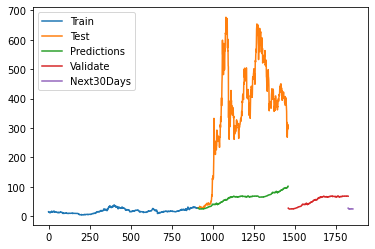

In [8]:
# ploting the actual values and predicted values
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Days'])
plt.show()